In [1]:
!pip install transformers

In [2]:
!pip install timm

In [3]:
!pip install img2table

In [4]:
!pip install pytesseract

In [5]:
# импортируем модули и библиотеки

from transformers import AutoImageProcessor, TableTransformerForObjectDetection
from huggingface_hub import hf_hub_download
from PIL import Image
from img2table.ocr import TesseractOCR
from img2table.document import Image as i2tImage
import timm
import torch
import pytesseract

In [6]:
# путь к импорту файла (фото 213950)

file_path = r'/content/drive/MyDrive/MasterLab OCR/405/405/213950.jpg'

In [7]:
# определяем координаты таблицы на изображении

image = Image.open(file_path).convert("RGB")

image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Detected table with confidence 0.974 at location [297.1, 2885.1, 3036.71, 4174.5]


In [8]:
# вырезаем область таблицы из изображения

image = image.crop(set(box))


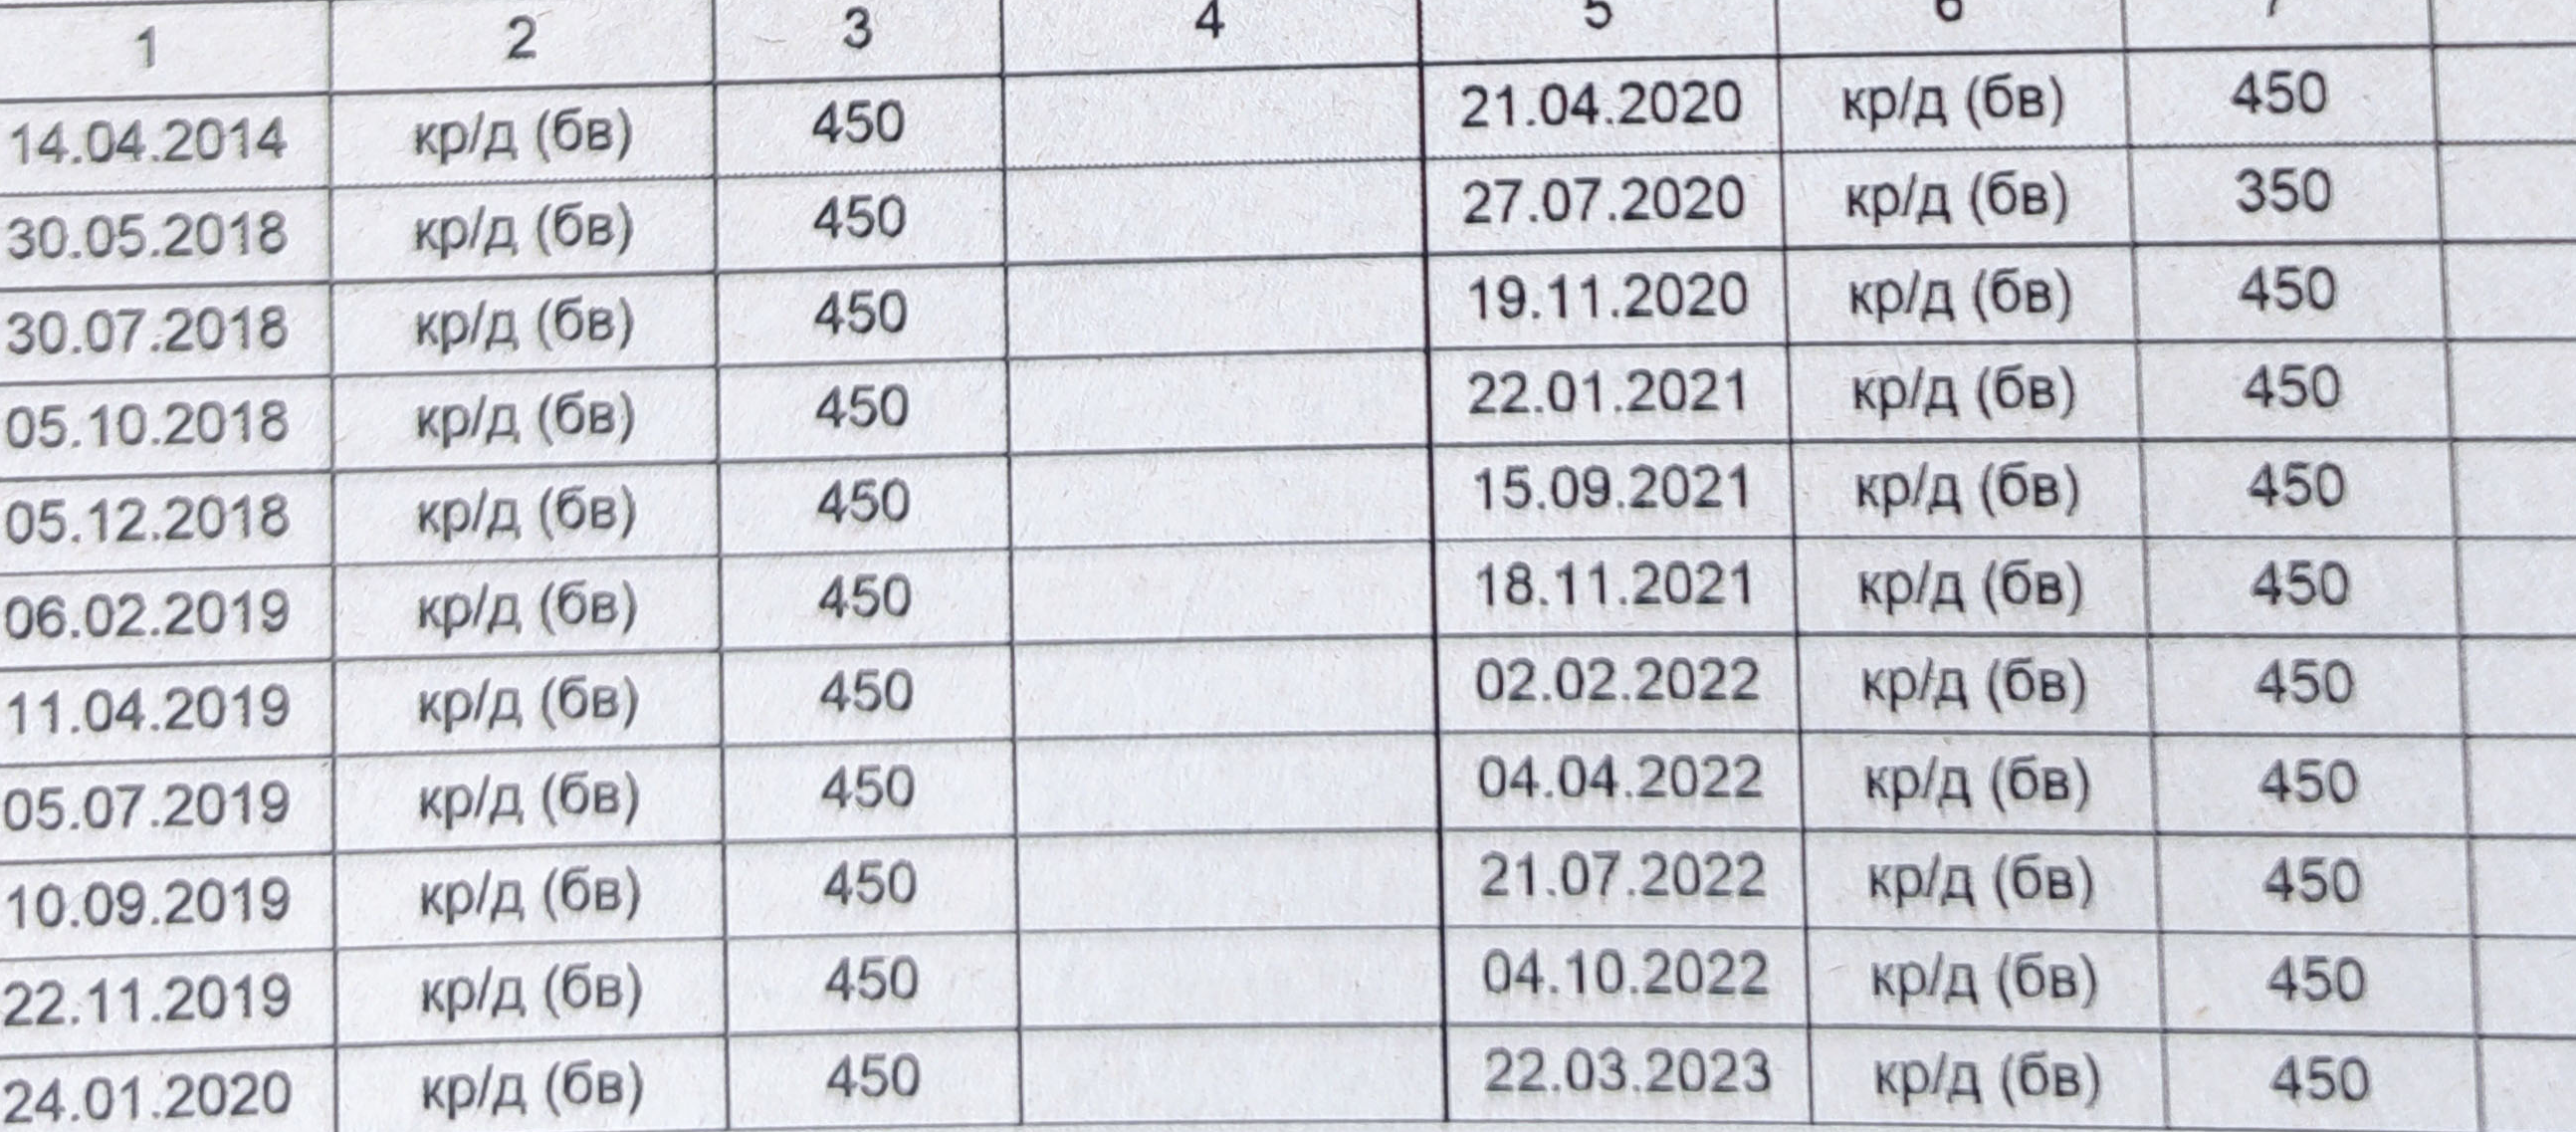

In [9]:
image

In [10]:
# извлечение таблицы из изображения

# Instantiation of OCR
ocr = TesseractOCR(n_threads=1, lang="rus")

# Instantiation of document, either an image or a PDF
image_213950 = i2tImage(image)

# Table extraction
extracted_tables = image_213950.extract_tables(ocr=ocr,
                                      implicit_rows=False,
                                      borderless_tables=False,
                                      min_confidence=50)

OSError: ignored